# Loan Application Status Prediction

In [186]:
# Importing Laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [187]:
# Loading Dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Exploratory Data Analysis (EDA)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [189]:
# Checking Data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here we can see there are 8 columns which have categorical values and remaining 5 have numerical values

In [190]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [191]:
# Checking Null Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

4 Categorical columns and 3 Numeric columns have Null values and need to handle it

In [192]:
#Handle Categorical missing values
for i in ('Gender', 'Married', 'Dependents', 'Self_Employed'):
    print(df[i].value_counts()[df[i].value_counts() == df[i].value_counts().max()],'\n')
    print('********************')

Male    489
Name: Gender, dtype: int64 

********************
Yes    398
Name: Married, dtype: int64 

********************
0    345
Name: Dependents, dtype: int64 

********************
No    500
Name: Self_Employed, dtype: int64 

********************


In [193]:
df['Gender']=df['Gender'].fillna('Male')
df['Married']=df['Married'].fillna('Yes')
df['Dependents']=df['Dependents'].fillna('0')
df['Self_Employed']=df['Self_Employed'].fillna('No')

In [194]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here I use most frequent category because our dataset is small and missing values also in small amount. This method works good for small dataset.

In [195]:
# Now deal with numeric missing values
df['LoanAmount']=df['LoanAmount'].replace(np.NaN, df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace(np.NaN, df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].replace(np.NaN, df['Credit_History'].mean())

Here I use imputr missing vlaues with mean

In [196]:
#after handling null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now dataset is ready for further process

In [197]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [198]:
#statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Visualization

In [199]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

Male      502
Female    112
Name: Gender, dtype: int64


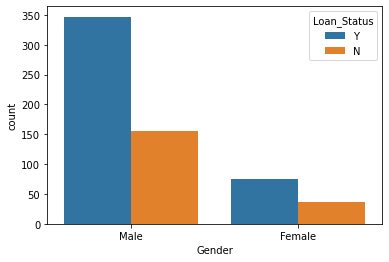

In [200]:
#For categorical data
ax = sns.countplot (x = "Gender", hue = "Loan_Status", data = df)
print(df["Gender"].value_counts())

Loan status for male is higher than female

Yes    401
No     213
Name: Married, dtype: int64


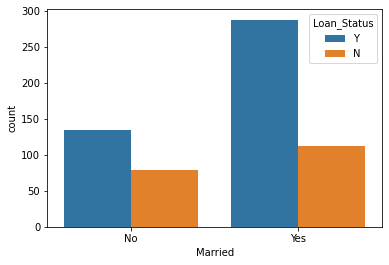

In [201]:
ax = sns.countplot (x = "Married", hue = "Loan_Status", data = df)
print(df["Married"].value_counts())

Loan approval chances are high for married person

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


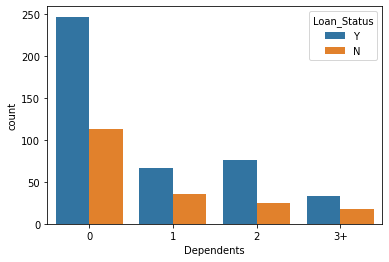

In [202]:
ax = sns.countplot (x = "Dependents", hue = "Loan_Status", data = df)
print(df["Dependents"].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


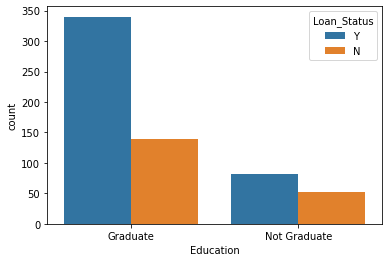

In [203]:
ax = sns.countplot (x = "Education", hue = "Loan_Status",data = df)
print(df["Education"].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


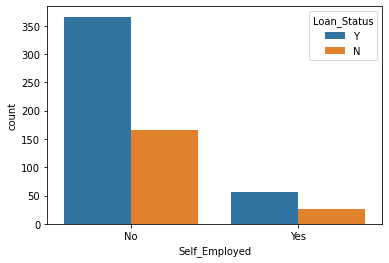

In [204]:
ax = sns.countplot (x = "Self_Employed", hue = "Loan_Status", data = df)
print(df["Self_Employed"].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


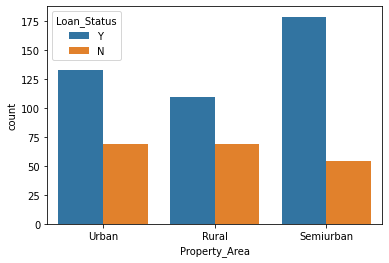

In [205]:
ax = sns.countplot (x = "Property_Area", hue = "Loan_Status", data = df)
print(df["Property_Area"].value_counts())

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


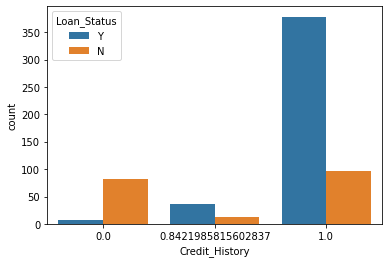

In [206]:
ax = sns.countplot (x = "Credit_History", hue = "Loan_Status", data = df)
print(df["Credit_History"].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


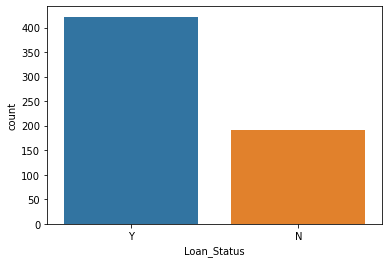

In [207]:
ax = sns.countplot(x="Loan_Status",data=df)
print(df["Loan_Status"].value_counts())

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

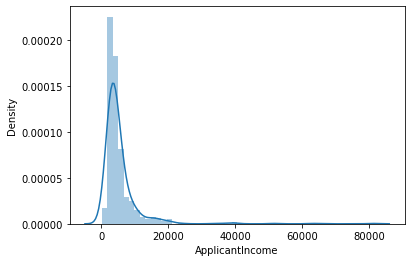

In [208]:
# Visualization for numerical data
sns.distplot(df['ApplicantIncome'],kde=True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

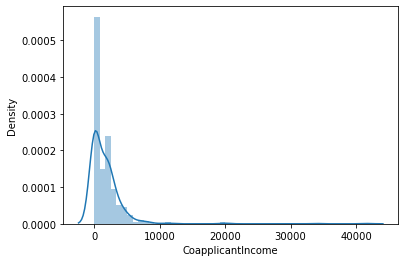

In [209]:
sns.distplot(df['CoapplicantIncome'],kde=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

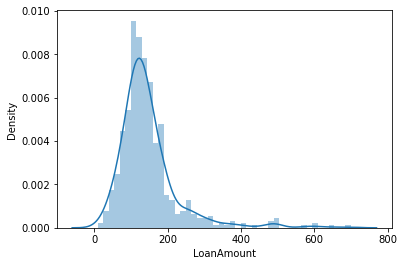

In [210]:
sns.distplot(df['LoanAmount'],kde=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

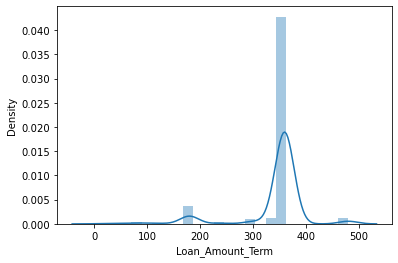

In [211]:
sns.distplot(df['Loan_Amount_Term'],kde=True)

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

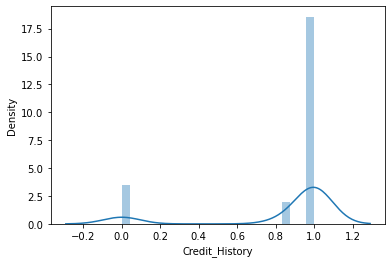

In [212]:
sns.distplot(df['Credit_History'],kde=True)

# Encoding of Dataframe:

In [213]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [214]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))


In [215]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [216]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

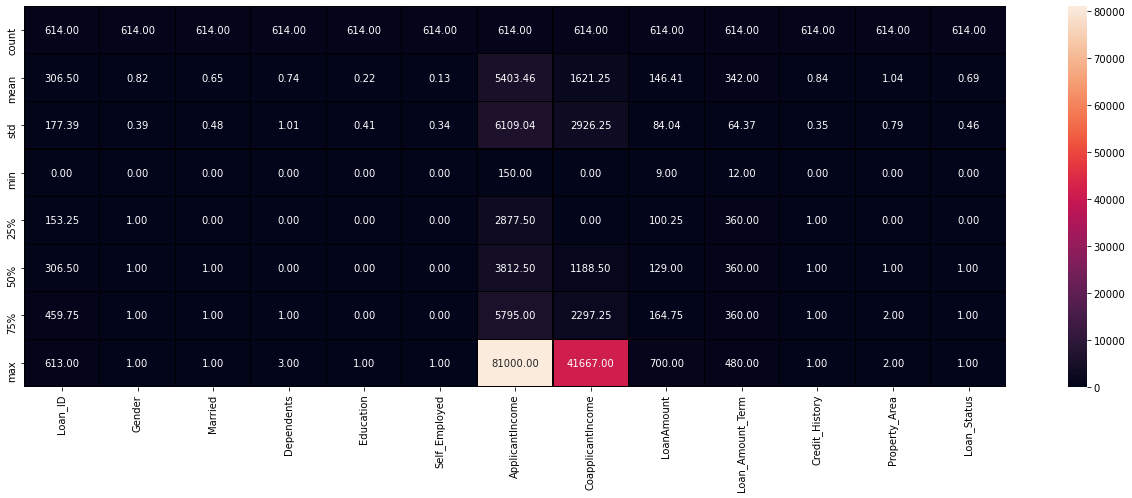

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), annot=True, linewidth=0.1 ,linecolor="black", fmt="0.2f")

In [218]:
#Correlation between Feature variable and Target Variable
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<AxesSubplot:>

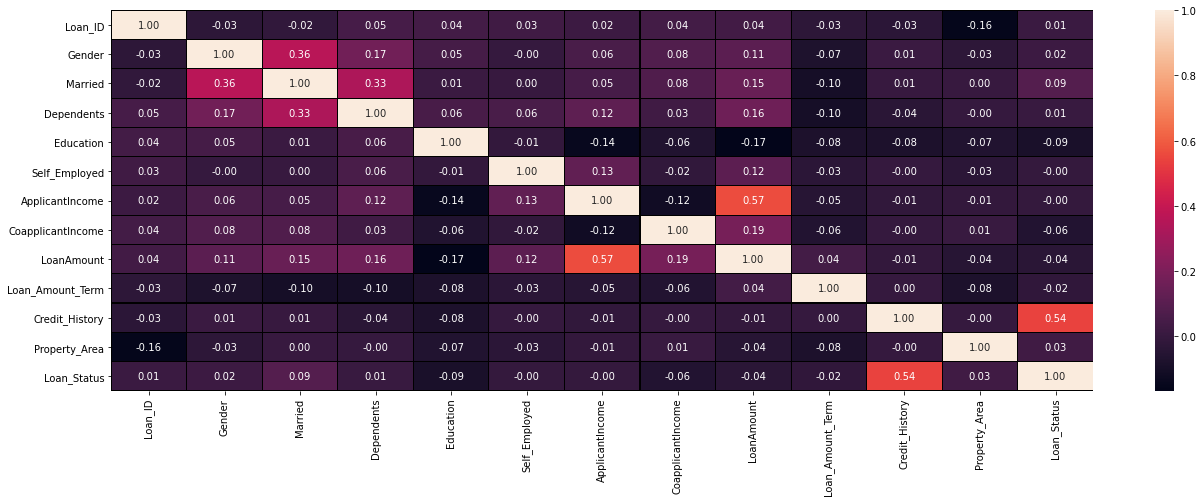

In [219]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor="black", fmt="0.2f")

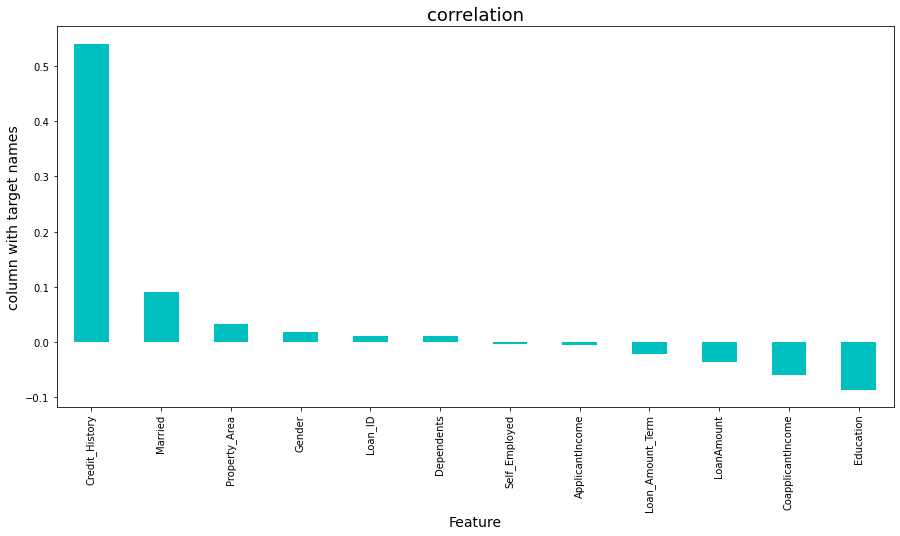

In [220]:
#checking correlation high to low 
plt.figure(figsize=(15,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar', color ='c')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation', fontsize = 18)
plt.show()

'Credit_History' is Most highly corelated variable, 'Education' is Least corelated variable

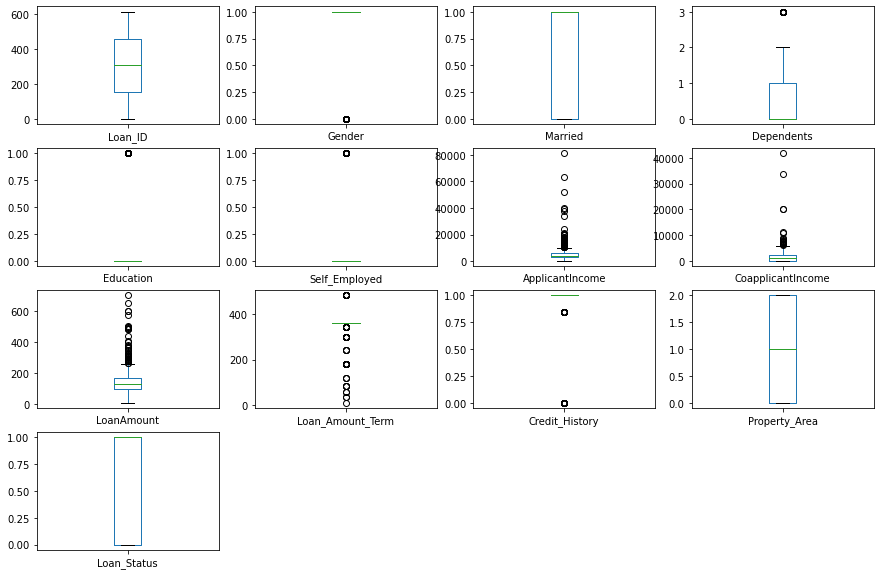

In [221]:
# Outliers Checking
df.plot(kind='box', subplots = True, layout=(4,4), figsize=(15,10));

In [222]:
df.shape

(614, 13)

In [223]:
# Considering the outlier removal
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z<3)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64),
 array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))

In [224]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [228]:
#After removing outliers
df_new_z.shape

(577, 13)

In [226]:
#Percentage loss of data:
Data_loss=((614 - 577)/614)*100
Data_loss

6.026058631921824

In [229]:
df=df_new_z

In [231]:
# Seperating Independent Variables and Dependent Variables(Target Variables)
x=df.drop(['Loan_Status'], axis=1)
y=df['Loan_Status']

In [233]:
# Checking skewness:
#No need to handle skewness if it between -0.5 to 0.5
x.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
dtype: float64

In [234]:
#Handling Skewness
from sklearn.preprocessing import power_transform
z = power_transform(x[0:])
df_new_z= pd.DataFrame(z,columns=x.columns)

In [235]:
x=df_new_z

In [236]:
#Checking again after removing skewness
x.skew()

Loan_ID             -0.284298
Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
Property_Area       -0.155094
dtype: float64

Self_Employed is negatively corelated

1.0    398
0.0    179
Name: Loan_Status, dtype: int64


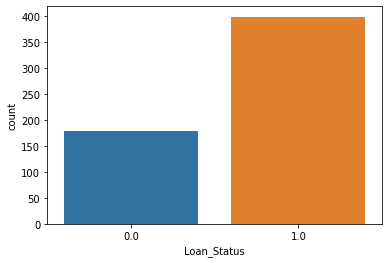

In [243]:
#Visualization again after doing all the process
ax = sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

In [244]:
# Scalling the data values
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [245]:
x=mms.fit_transform(x)

#### Model building

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = 10)

In [271]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.8188585607940446

#### Predictions

In [272]:
pred=lm.predict(x_test)
print('Predicted Loan Approval',pred)
print('Actual Loan Approval',y_test)

Predicted Loan Approval [0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0.]
Actual Loan Approval 449    0.0
292    1.0
49     1.0
483    1.0
353    0.0
      ... 
112    0.0
370    1.0
394    1.0
191    0.0
466    0.0
Name: Loan_Status, Length: 174, dtype: float64


In [273]:
print('Accuracy Score:',accuracy_score(y_test,pred))

Accuracy Score: 0.7988505747126436


In [278]:
#Finding Best Random State to get best Accuracy:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
max_accu=0
max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predrf = lr.predict(x_test)
    acc =accuracy_score(y_test,predrf)
    if acc > max_accu:
        max_accu = acc
        max_rs = i

print('Best score is: ',max_accu,'on Random_state',max_rs)

Best score is:  0.8563218390804598 on Random_state 12


In [279]:
#Train-Test model based on Best Random State:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = 12)
lr = LogisticRegression()
lr.fit(x_train,y_train)
predrf = lr.predict(x_test)

In [280]:
#Confusion Matrix for Logistic Regression:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('Accuracy Score:', accuracy_score(y_test,predrf))
print('Confusion Matrix:', confusion_matrix(y_test,predrf))
print('Classification Report:', classification_report(y_test,predrf))

Accuracy Score: 0.8563218390804598
Confusion Matrix: [[ 24  18]
 [  7 125]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.77      0.57      0.66        42
         1.0       0.87      0.95      0.91       132

    accuracy                           0.86       174
   macro avg       0.82      0.76      0.78       174
weighted avg       0.85      0.86      0.85       174



In [281]:
#Confusion Matrix for Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))


Accuracy Score: 0.7298850574712644
Confusion Matrix: [[ 26  16]
 [ 31 101]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.46      0.62      0.53        42
         1.0       0.86      0.77      0.81       132

    accuracy                           0.73       174
   macro avg       0.66      0.69      0.67       174
weighted avg       0.76      0.73      0.74       174



In [282]:
# Cross Validation
pred_train = lr.predict(x_train)
pred_test =lr.predict(x_test)
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
max_accu=0
max_rs=0

In [315]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > max_accu:
        max_accu = cv_mean
        max_rs = j
    print(f'At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}')
    print('\n')


At cross fold 2 cv score is 0.8180627643214149 and accuracy score training is 0.7890818858560794 and accuracy for the testing is 0.8563218390804598


At cross fold 3 cv score is 0.8059153713298791 and accuracy score training is 0.7890818858560794 and accuracy for the testing is 0.8563218390804598


At cross fold 4 cv score is 0.7989942528735633 and accuracy score training is 0.7890818858560794 and accuracy for the testing is 0.8563218390804598


At cross fold 5 cv score is 0.8042278860569715 and accuracy score training is 0.7890818858560794 and accuracy for the testing is 0.8563218390804598


At cross fold 6 cv score is 0.805895618556701 and accuracy score training is 0.7890818858560794 and accuracy for the testing is 0.8563218390804598


At cross fold 7 cv score is 0.8025691616640779 and accuracy score training is 0.7890818858560794 and accuracy for the testing is 0.8563218390804598


At cross fold 8 cv score is 0.8041999619482496 and accuracy score training is 0.7890818858560794 and 

In [291]:
#Cross Validation for Logistic Regrssion:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=j)
cv_mean = cv_score.mean()
print('Cross validation score for Logistic Regression',cv_mean)

Cross validation score for Logistic Regression 0.804408457040036


In [292]:
#Cross Validation for Decision Tree Classifier:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
print('Cross validation score for Decision Tree',cv_mean)


Cross validation score for Decision Tree 0.6750337381916329


In [296]:
# Regularization
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [297]:
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [298]:
EN = ElasticNet(alpha=0.01,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)
lss= accuracy_score(y_test,pred_test)
lss

0.8563218390804598

In [299]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score
cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.28218048314790745

In [301]:
# Ensemble technique
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':np.arange(2,15),'criterion':['gini','entrophy']}
rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 2}


In [302]:
rf=DecisionTreeClassifier(criterion='gini',max_depth=2)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

In [304]:
rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score: ',rfs*100)

Accuracy Score:  88.50574712643679


In [308]:
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Validation Score:',rfc*100)

Cross Validation Score: 81.29085457271363


We are getting model accuracy 88.50% and cross validation 81.29% 

In [310]:
import pickle
filename = 'Loan_Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

In [311]:
#Loading Model:
loaded_model=pickle.load(open('Loan_Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8850574712643678


In [313]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [314]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
Predicted,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Orginal,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
